In [5]:
#!pip install streamlit

In [3]:
#!pip install chart_studio

     |████████████████████████████████| 64 kB 2.1 MB/s 


In [12]:
#!pip install yfinance

     |████████████████████████████████| 6.3 MB 20.7 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24109 sha256=ada32ddb53cb307c36f1ba4bf293b57e4bd2a93cb36b5a16c780cdd27b7e0e84
  Stored in directory: /root/.cache/pip/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [1]:
import pandas as pd
import numpy as np
import streamlit as st
import chart_studio.plotly as plotly
import plotly.figure_factory as ff
from plotly import graph_objs as go
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import yfinance as yf

In [2]:
st.title('Stock Forecast App')

dataset = ('AAPL','TESLA','MSCT')

2021-10-31 22:13:56.457 
  command:

    streamlit run /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py [ARGUMENTS]


In [3]:
option = st.selectbox('Select dataset for prediction',dataset)

year = st.slider('Year of prediction:',1,4)
period = year * 365

In [4]:
@st.cache
def load_data(option):
    data = yf.download(option, start="2010-01-01")
    data = data.reset_index()
    return data

In [16]:
#option = 'AAPL'
#data = yf.download(option, start="2010-01-01")
#data = data.reset_index()
#data

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562590,493729600
1,1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800
2,2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469368,552160000
3,3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457408,477131200
4,4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.500340,447610800
...,...,...,...,...,...,...,...,...
2973,2973,2021-10-25,148.679993,149.369995,147.619995,148.639999,148.639999,50720600
2974,2974,2021-10-26,149.330002,150.839996,149.009995,149.320007,149.320007,60893400
2975,2975,2021-10-27,149.360001,149.729996,148.490005,148.850006,148.850006,56094900
2976,2976,2021-10-28,149.820007,153.169998,149.720001,152.570007,152.570007,100077900


In [ ]:
data_load_state = st.text('Loading data...')
data = load_data()
data_load_state.text('Loading data... done!')


In [9]:
def plot_fig():
	fig = go.Figure()
	fig.add_trace(go.Scatter(x=data.Date, y=data['Open'], name="stock_open",line_color='blue'))
	fig.add_trace(go.Scatter(x=data.Date, y=data['Close'], name="stock_close",line_color='green'))
	fig.layout.update(title_text='Time Series data with Rangeslider',xaxis_rangeslider_visible=True)
	st.plotly_chart(fig)
	return fig


In [10]:
if st.checkbox('Show raw data'):
    st.subheader('Raw data')
    st.write(data)

In [11]:
	# plotting the figure of Actual Data
plot_fig()

In [12]:
# preparing the data for Facebook-Prophet.
data_pred = data[['Date','Close']]
data_pred=data_pred.rename(columns={"Date": "ds", "Close": "y"})

In [13]:
# code for facebook prophet prediction
m = Prophet()
m.fit(data_pred)
future = m.make_future_dataframe(periods=period)
forecast = m.predict(future)

2021-10-31 22:16:15.731 Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -119.664
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8540.78     0.0138938       4105.01      0.4815     0.04815      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8938.93   0.000319795       265.346           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299          9008     0.0204757       858.107           1           1      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       9036.39     0.0237297       3208.15           1           1      472   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        9052.9    0.00151897       303.147           1           1      592   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [14]:
#plot forecast
fig1 = plot_plotly(m, forecast)
if st.checkbox('Show forecast data'):
    st.subheader('forecast data')
    st.write(forecast)
st.write('Forecasting closing of stock value for'+option+' for a period of: '+str(year)+'year')
st.plotly_chart(fig1)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

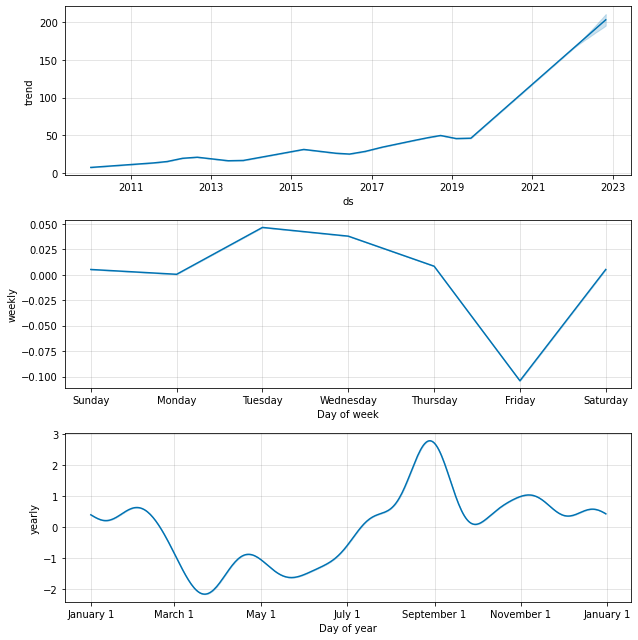

In [15]:
#plot component wise forecast
st.write("Component wise forecast")
fig2 = m.plot_components(forecast)
st.write(fig2)